# Clasificador de gestos de manos 

- Curso: INFO257 Inteligencia Artificial
- Profesor: Pablo Huijse 
- Consultas por slack o correo: phuijse at inf dot uach dot cl 

## Objetivo

El objetivo de esta actividad es entrenar una red convolucional para clasificar gestos de manos 

Se consideran los siguientes tres gestos

<table>
    <tr>
        <td>
            <img src="img/1.jpg">
        </td>
        <td>
            <img src="img/2.jpg">
        </td>
        <td>
            <img src="img/3.jpg">
        </td>
    </tr>
</table>

1. Un dedo levantado
1. Dos dedos levantados
1. Tres dedos levantados

Más una clase adicional que corresponde a "fondo vacío", totalizando cuatro clases a discriminar


## Datos

Para resolver esta tarea se le ha proporcionado una base de datos que puede descargar en el siguiente enlace: 

> https://drive.google.com/file/d/1m9fKMYpUX24sB9PijXq2g54EBxe2W-eO/view?usp=sharing

La base de datos ya está separada en conjuntos de entrenamiento, validación y prueba




## Instrucciones generales

- Se trabajará en grupos de dos personas
- El grupo debe crear un repositorio privado en www.github.com 
- Invite a su profesor como colaborador (usuario: phuijse)
- No suba los datos al repositorio, suba sólo sus códigos fuente y reportes de resultado
- Se evaluará en base al último *commit* del Lunes 10 de Agosto de 2020
- Desarrolle en PyTorch
- [Sean honestos](https://www.acm.org/about-acm/code-of-ethics-in-spanish)



## Instrucciones específicas

1. Proponga, entrene y compare distintos modelos de red convolucional para resolver el problema
    - Ajuste los parámetros del modelo usando el conjunto de entrenamiento 
    - Calibre sus hiper-parámetros y prevenga el sobreajuste evaluando en el conjunto de validación 
    - Compare los modelos finales midiendo su rendimiento en el conjunto de prueba
    - Justifique sus decisiones de función de costo, optimizador, arquitectura, regularización, etc.
1. Considere al menos dos modelos en su comparación
    - Arquitectura convolucional diseñada por usted. Puede partir de una arquitectura existente (e.g. Lenet5) y proponer mejoras de forma iterativa
    - Arquitectura ResNet18 pre-entrenada en ImageNet como extractor de características. Diseñe sólo el clasificador final y mantenga el modelo extractor congelado para entrenar
1. Presente sus resultados usando matrices de confusión, *accuraccy* y *f1-score*. Considere 5 inicializaciones aleatorias y obtenga barras de error para sus métricas.
1. Reporte su proceso, Analice sus resultados, discuta y concluya

# Modelo AlexNet

In [1]:
from torchvision import models
import numpy as np
model = models.alexnet(pretrained=True, progress=True)
display(model)

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


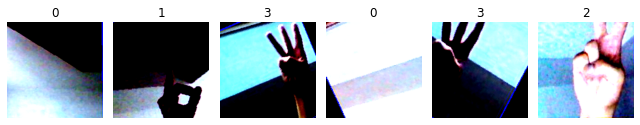

In [2]:
from torchvision import transforms
from torchvision import datasets
import torch
import matplotlib.pyplot as plt
train_transforms = transforms.Compose([transforms.RandomRotation(30),
                                       transforms.RandomResizedCrop(224),
                                       transforms.RandomHorizontalFlip(),
                                       transforms.ToTensor(),
                                       transforms.Normalize([0.485, 0.456, 0.406],
                                                            [0.229, 0.224, 0.225])])

valid_transforms = transforms.Compose([transforms.Resize(255),
                                       transforms.CenterCrop(224),
                                       transforms.ToTensor(),
                                       transforms.Normalize([0.485, 0.456, 0.406],
                                                            [0.229, 0.224, 0.225])])
test_transforms = transforms.Compose([transforms.Resize(255),
                                       transforms.CenterCrop(224),
                                       transforms.ToTensor(),
                                       transforms.Normalize([0.485, 0.456, 0.406],
                                                            [0.229, 0.224, 0.225])])

train_dataset = datasets.ImageFolder('gestos/train', transform=train_transforms)
valid_dataset = datasets.ImageFolder('gestos/valid', transform=valid_transforms)
test_dataset = datasets.ImageFolder('gestos/test', transform=test_transforms)

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=32, shuffle=True)
valid_loader = torch.utils.data.DataLoader(valid_dataset, batch_size=256, shuffle=False)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=128, shuffle=True)

for image, label in train_loader:
    break
    
fig, ax = plt.subplots(1, 6, figsize=(9, 2), tight_layout=True)
for i in range(6):
    ax[i].imshow(image[i].permute(1,2,0).numpy())
    ax[i].axis('off')
    ax[i].set_title(label[i].numpy())

In [3]:
#Congelamos todos los parámetros
for param in model.parameters(): 
    param.requires_grad = False

# Recuperamos el número de neuronas de la última capa
 
model.classifier[6] = torch.nn.Linear(model.classifier[6].in_features,4)
 
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)

for epoch in range(1):
    train_loss = 0.0
    for x, y in train_loader:
        model.train()
        optimizer.zero_grad()
        yhat = model.forward(x)
        loss = criterion(yhat, y)
        train_loss += loss.item()
        loss.backward()
        optimizer.step()

    valid_loss = 0.0
    for x, y in valid_loader:
        model.eval()
        yhat = model.forward(x)
        loss = criterion(yhat, y)
        valid_loss += loss.item()
        with torch.no_grad():
          yhat = model.forward(x)
          loss = criterion(yhat, y)
          valid_loss += loss.item()
    print(f"Epoca: {epoch} \t train_Loss: {train_loss:.2f} \t Valid_Loss: {valid_loss:.2f}")


Epoca: 0 	 train_Loss: 147.46 	 Valid_Loss: 17.19


In [4]:
print(valid_loss)

17.19490490294993


In [5]:

targets, predictions = [], []
for mbdata, label in test_loader:
    logits = model.forward(mbdata)
    predictions.append(logits.argmax(dim=1).detach().numpy())
    targets.append(label.numpy())
predictions = np.concatenate(predictions)
targets = np.concatenate(targets)

from sklearn.metrics import confusion_matrix, classification_report

cm = confusion_matrix(targets, predictions)
display(cm)
print(predictions)
print(classification_report(targets, predictions))

array([[ 9,  3,  2, 16],
       [ 0, 13,  3, 14],
       [ 0,  9, 11, 10],
       [ 0,  3,  5, 22]], dtype=int64)

[3 1 2 3 1 3 2 2 3 3 1 2 3 3 2 3 3 2 3 3 1 3 2 1 1 3 3 2 2 2 3 3 1 3 3 3 1
 1 1 3 0 1 1 0 3 2 3 2 1 1 1 3 1 0 3 3 2 3 2 0 1 3 0 3 1 3 3 3 2 1 3 1 3 2
 3 0 1 3 3 3 0 3 2 3 3 1 1 3 3 1 3 3 3 3 0 3 3 2 3 1 3 0 3 3 3 1 3 2 1 3 3
 3 1 3 3 3 2 3 2 3]
              precision    recall  f1-score   support

           0       1.00      0.30      0.46        30
           1       0.46      0.43      0.45        30
           2       0.52      0.37      0.43        30
           3       0.35      0.73      0.48        30

    accuracy                           0.46       120
   macro avg       0.59      0.46      0.45       120
weighted avg       0.59      0.46      0.45       120



# Modelo GoogleNet

In [3]:
import torchvision.models as models
googlenet = models.googlenet(pretrained=True, progress=True)
display(googlenet)

GoogLeNet(
  (conv1): BasicConv2d(
    (conv): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn): BatchNorm2d(64, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (maxpool1): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=True)
  (conv2): BasicConv2d(
    (conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
    (bn): BatchNorm2d(64, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (conv3): BasicConv2d(
    (conv): Conv2d(64, 192, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn): BatchNorm2d(192, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (maxpool2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=True)
  (inception3a): Inception(
    (branch1): BasicConv2d(
      (conv): Conv2d(192, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn): BatchNorm2d(64, eps=0.001, momentum=0.1, affine=True, track

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


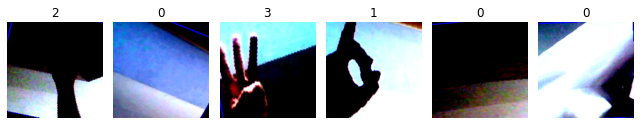

In [4]:
from torchvision import transforms
from torchvision import datasets
import torch
import matplotlib.pyplot as plt
train_transforms = transforms.Compose([transforms.RandomRotation(30),
                                       transforms.RandomResizedCrop(224),
                                       transforms.RandomHorizontalFlip(),
                                       transforms.ToTensor(),
                                       transforms.Normalize([0.485, 0.456, 0.406],
                                                            [0.229, 0.224, 0.225])])

valid_transforms = transforms.Compose([transforms.Resize(255),
                                       transforms.CenterCrop(224),
                                       transforms.ToTensor(),
                                       transforms.Normalize([0.485, 0.456, 0.406],
                                                            [0.229, 0.224, 0.225])])
test_transforms = transforms.Compose([transforms.Resize(255),
                                       transforms.CenterCrop(224),
                                       transforms.ToTensor(),
                                       transforms.Normalize([0.485, 0.456, 0.406],
                                                            [0.229, 0.224, 0.225])])

train_dataset = datasets.ImageFolder('gestos/train', transform=train_transforms)
valid_dataset = datasets.ImageFolder('gestos/valid', transform=valid_transforms)
test_dataset = datasets.ImageFolder('gestos/test', transform=test_transforms)

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=32, shuffle=True)
valid_loader = torch.utils.data.DataLoader(valid_dataset, batch_size=256, shuffle=False)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=128, shuffle=True)

for image, label in train_loader:
    break
    
fig, ax = plt.subplots(1, 6, figsize=(9, 2), tight_layout=True)
for i in range(6):
    ax[i].imshow(image[i].permute(1,2,0).numpy())
    ax[i].axis('off')
    ax[i].set_title(label[i].numpy())

In [5]:
#Congelamos todos los parámetros
for param in model.parameters(): 
    param.requires_grad = False

# Recuperamos el número de neuronas de la última capa
neurons = googlenet.fc.in_features 
# La reemplazamos por una nueva capa de salida
googlenet.fc = torch.nn.Linear(neurons, 4) 

criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(googlenet.parameters(), lr=1e-3)

for epoch in range(10):
    for x, y in train_loader:
        optimizer.zero_grad()
        yhat = model.forward(x)
        loss = criterion(yhat, y)
        loss.backward()
        optimizer.step()

    epoch_loss = 0.0
    for x, y in valid_loader:
        yhat = model.forward(x)
        loss = criterion(yhat, y)
        epoch_loss += loss.item()
    print(epoch, epoch_loss)

RuntimeError: element 0 of tensors does not require grad and does not have a grad_fn